This notebook reads in two SLCs and plots:
1. VV SLC magnitudes (on dates 1,2), VH SLC magnitudes (on dates 1,2)
2. VV interferogram, VH interferogram

This notebook was organized on 9-26-22

***

Import things. Use conda environment oliviaJupyter.

In [2]:
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Define working directory, crop directory, dates we want to load in, dimensions of raw SLCs, and filtering window dimensions. 


In [3]:
workdir = '/data/ocp4/LagunaSalada'
#cropdir='cropped_9000_20_10000_1780'
cropdir='cropped_9000_1800_18000_3600'                                     
date1='20180330'
date2='20180306'

x1=0
#dx=10000
dx=18000
y1=0
#dy=1780
dy=3600

alooks=4
rlooks=20

Load in the slcs we want to plot and use to make an interferogram.


In [4]:
ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date1+"/"+date1+".slc.full", gdal.GA_ReadOnly)
slc1vv = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vh/"+date1+"/"+date1+".slc.full", gdal.GA_ReadOnly)
slc1vh = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date2+"/"+date2+".slc.full", gdal.GA_ReadOnly)
slc2vv = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vh/"+date2+"/"+date2+".slc.full", gdal.GA_ReadOnly)
slc2vh = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

Calculate phase and magnitude for each SLC in VV and VH.

In [7]:
slc1phsVV = np.angle(slc1vv);  slc2phsVV = np.angle(slc2vv);
slc1magVV = np.abs(slc1vv);    slc2magVV = np.abs(slc2vv);
slc1phsVH = np.angle(slc1vh);  slc2phsVH = np.angle(slc2vh);
slc1magVH = np.abs(slc1vh);    slc2magVH = np.abs(slc2vh);

Plot the VV and VH SLCs individually that we loaded. These will be used to produce an interferogram next. 

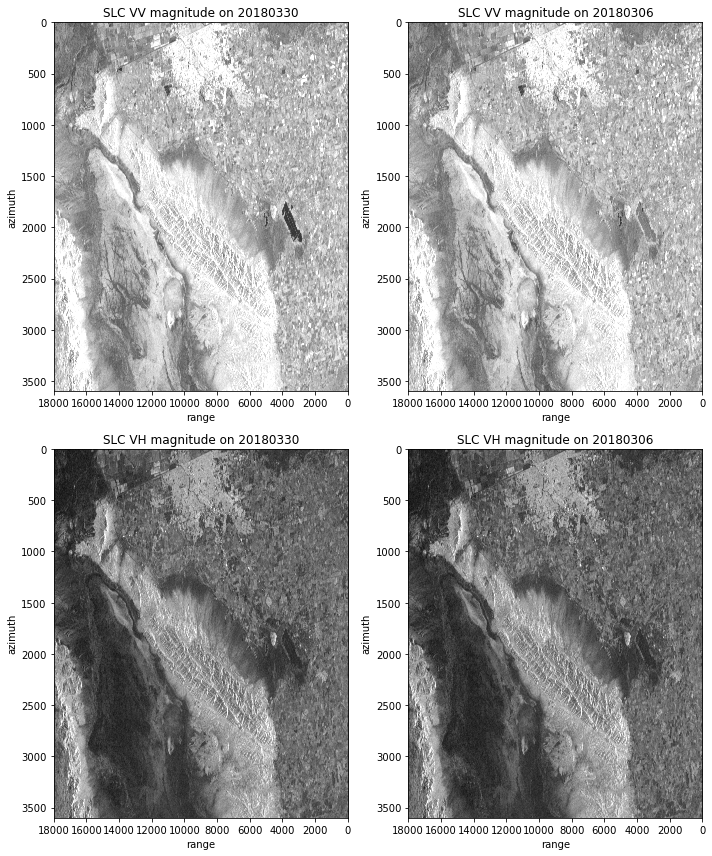

In [14]:
plt.figure(figsize=(10, 12),tight_layout=True)

my_vmin = 1
my_vmax = 2.2

plt.subplot(2,2,1)
plt.imshow(np.log10(slc1magVV), vmin=my_vmin, vmax=my_vmax, cmap='gray', aspect='auto')
plt.xlim(np.shape(slc1magVV)[1], 0)
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('SLC VV magnitude on '+str(date1))

plt.subplot(2,2,2)
plt.imshow(np.log10(slc2magVV), vmin=my_vmin, vmax=my_vmax, cmap='gray', aspect='auto')
plt.xlim(np.shape(slc2magVV)[1], 0)
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('SLC VV magnitude on '+str(date2))

plt.subplot(2,2,3)
plt.imshow(np.log10(slc1magVH), vmin=my_vmin, vmax=my_vmax, cmap='gray', aspect='auto')
plt.xlim(np.shape(slc1magVH)[1], 0)
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('SLC VH magnitude on '+str(date1))

plt.subplot(2,2,4)
plt.imshow(np.log10(slc2magVH), vmin=my_vmin, vmax=my_vmax, cmap='gray', aspect='auto')
plt.xlim(np.shape(slc2magVH)[1], 0)
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('SLC VH magnitude on '+str(date2))

plt.show()

Calculate the interferograms (VV and VH).

In [16]:
int12vv = slc1vv * np.conj(slc2vv)
int12vh = slc1vh * np.conj(slc2vh)

Plot the interferograms.

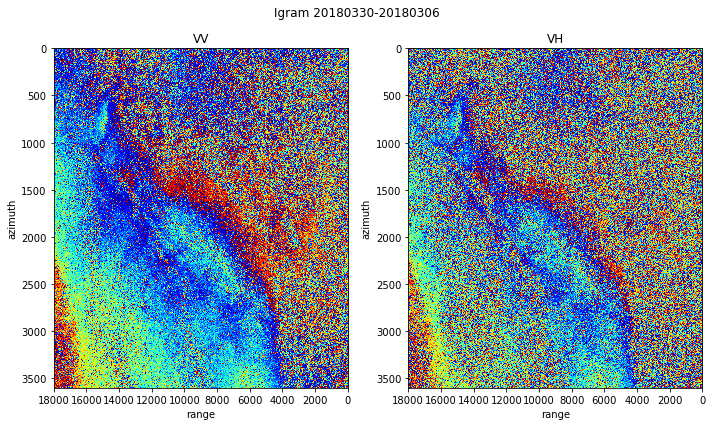

In [21]:
plt.figure(figsize=(10, 6),tight_layout=True)

plt.subplot(1,2,1)
plt.imshow(np.angle(int12vv),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.xlim(np.shape(int12vv)[1], 0)
plt.title('VV')
plt.xlabel('range')
plt.ylabel('azimuth')

plt.subplot(1,2,2)
plt.imshow(np.angle(int12vh),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', interpolation='nearest')
plt.xlim(np.shape(int12vh)[1], 0)
plt.title('VH')
plt.xlabel('range')
plt.ylabel('azimuth')

plt.suptitle('Igram '+str(date1)+'-'+str(date2))

plt.show()